<a href="https://colab.research.google.com/github/ajdduck/DeepLearning_Cucumber/blob/master/cucumber_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
DATA_PATH = "/content/drive/My Drive/cucumber-9-python"

def one_hot(vec, vals = 9):
  n = len(vec)
  out = np.zeros((n, vals))
  out[range(n), vec] = 1
  return out

In [0]:
def unpickle(file):
  with open(os.path.join(DATA_PATH, file), 'rb') as fo:
    u = pickle._Unpickler(fo)
    u.encoding = 'latin1'
    dict = u.load()

    return dict

In [0]:
def display_cucumber(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
                    for i in range(size)])
    plt.imshow(im)
    plt.show()

In [0]:
class CucumberLoader(object):
  def __init__(self, source_files):
    self._source = source_files
    self._i = 0
    self.images = None
    self.labels = None

  def load(self):
    data = [unpickle(f) for f in self._source]
    images = np.vstack([d["data"] for d in data])
    n = len(images)
    self.images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype(float) / 255
    self.labels = one_hot(np.hstack([d["labels"] for d in data]), 9)
    return self

  def next_batch(self, batch_size):
    x, y = self.images[self._i:self._i+batch_size],
    self.labels[self._i:self._i+batch_size]
    self._i = (self._i + batch_size) % len(self.images)
    return x, y

  def next_batch(self, batch_size):
        x, y = self.images[self._i:self._i+batch_size], \
               self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size) % len(self.images)
        return x, y

In [0]:
cifar_10 = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch']

In [0]:
class CucumberDataManager(object):
  def __init__(self):
    self.train = CucumberLoader(['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']).load()
    self.test = CucumberLoader(["test_batch"]).load()

In [0]:
unpickle("data_batch_1").keys()

dict_keys(['data', 'labels', 'batch_label', 'filenames'])

In [0]:
cucumber = CucumberDataManager()

In [0]:
images = cucumber.train.images

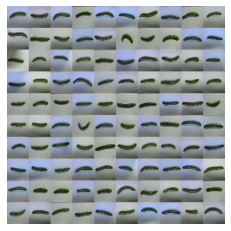

In [0]:
display_cucumber(images, 10)

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import random

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(tf.float32, shape = [None, 9])

keep_prob = tf.placeholder(tf.float32)

In [0]:
W1 = tf.Variable(tf.random_normal([5, 5, 3, 32], stddev=0.1))

L1 = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
W2 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev=0.1))

L2= tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [0]:
W3 = tf.Variable(tf.random_normal([5, 5, 64, 128], stddev=0.1))

L3= tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 4*4*128])

In [0]:
W4 = tf.get_variable("W4", shape=[4*4*128, 320], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([320]))

L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
W5 = tf.get_variable("W5", shape=[320, 9],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([9]))
logits = tf.matmul(L4, W5) + b5

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

Epoch:  0001 cost=  23.517634964
Epoch:  0002 cost=  8.897129059
Epoch:  0003 cost=  2.974771976
Epoch:  0004 cost=  2.375934792
Epoch:  0005 cost=  2.355570412
Epoch:  0006 cost=  2.287537956
Epoch:  0007 cost=  2.275758600
Epoch:  0008 cost=  2.263969946
Epoch:  0009 cost=  2.259550953
Epoch:  0010 cost=  2.235437059
Epoch:  0011 cost=  2.244678593
Epoch:  0012 cost=  2.221878099
Epoch:  0013 cost=  2.209011841
Epoch:  0014 cost=  2.194339657
Epoch:  0015 cost=  2.208317280
Epoch:  0016 cost=  2.166037226
Epoch:  0017 cost=  2.175373650
Epoch:  0018 cost=  2.149071503
Epoch:  0019 cost=  2.169633627
Epoch:  0020 cost=  2.134606171
Epoch:  0021 cost=  2.103639889
Epoch:  0022 cost=  2.121610212
Epoch:  0023 cost=  2.105226898
Epoch:  0024 cost=  2.073452806
Epoch:  0025 cost=  2.031072330
Epoch:  0026 cost=  2.033952832
Epoch:  0027 cost=  1.972379327
Epoch:  0028 cost=  1.938731885
Epoch:  0029 cost=  1.916952777
Epoch:  0030 cost=  1.835412431
Epoch:  0031 cost=  1.843390965
Epoch: 

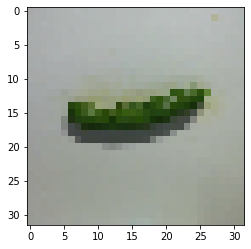

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(280):
  avg_cost = 0
  total_batch = 5
  for i in range(5):
    batch_xs, batch_ys = cucumber.train.next_batch(100)
    feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 0.7}
    c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
    avg_cost += c / total_batch

  print('Epoch: ', '%04d' % (epoch + 1), 'cost= ', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy: ', sess.run(accuracy, feed_dict={x: cucumber.test.images, y: cucumber.test.labels, keep_prob: 1}))

r = random.randint(0, len(cucumber.test.labels))
print("Label: ", sess.run(tf.argmax(cucumber.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={x: cucumber.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(cucumber.test.images[r:r + 1].
           reshape(32, 32, 3), cmap='Greys', interpolation='nearest')
plt.show()